#Práctica 5. Métodos Paramétricos.

### 1. Generar una muestra aleatoria de 10, 000 puntos de la distribución de Rayleigh utilizando $scale = 7.53$

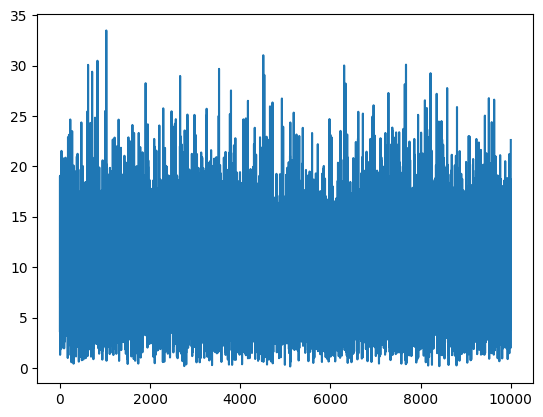

In [50]:
import numpy as np
import matplotlib.pyplot as plt

scale = 7.53
n = 10000
nbins = 160

ma = np.random.rayleigh(scale=scale, size=n)

plt.plot(ma)
plt.show()

### 2. Obtener 160 puntos del histograma de la muestra.

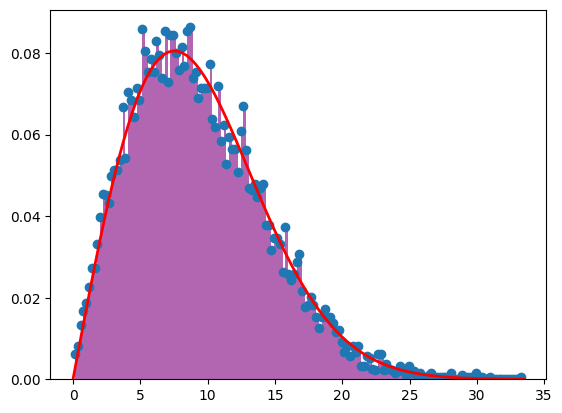

In [51]:
x = np.linspace(0, max(ma), 100)
pdf = (x /scale **2) * np.exp(-x**2 / (2 * scale**2))
plt.plot(x, pdf, 'r', linewidth=2)

plt.hist(ma, color='purple', bins=nbins, density=True, alpha=0.6)
hist, bin_edges = np.histogram(ma, bins=nbins, density=True)
plt.scatter(bin_edges[:-1], hist)
plt.show()

### 3. Dividir los puntos en conjunto de entrenamiento y prueba (80 - 20)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(bin_edges[:-1].reshape(-1,1), hist.reshape(-1, 1),
                                                    test_size=0.2, random_state=0)

### 4. Realiza una regresión polinomial del conjunto de entrenamiento probando distintos grados de polinomio. Calcula el sesgo y varianza para cada grado utilizado (Es posible que tengas que dividir tu conjunto de entrenamiento en entrenamiento y validación). Imprime los resultados en un dataframe de pandas: grado del polinomio, sesgo, varianza, $MAE$, $MSE$, $R^2$.

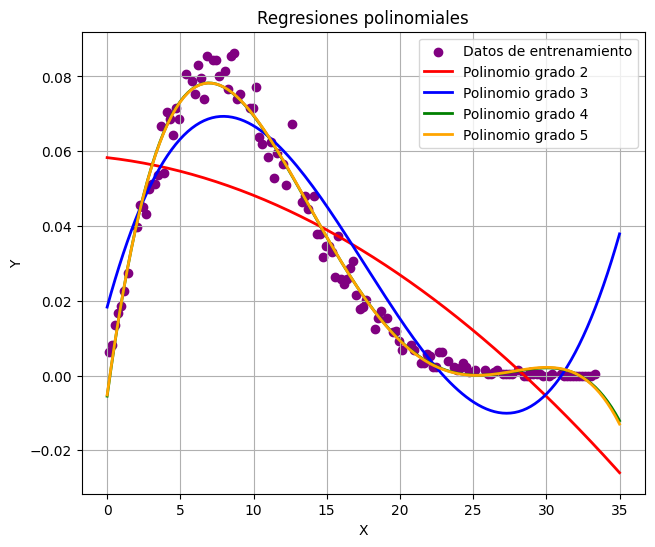

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_axis = np.linspace(0, 35, 128).reshape(128, 1)

reg_0 = PolynomialFeatures(degree=2)
lin_reg_0 = LinearRegression().fit(reg_0.fit_transform(X_train), Y_train)
X_plot_0 = reg_0.transform(X_axis)
Y_reg_0 = lin_reg_0.predict(X_plot_0)

reg_1 = PolynomialFeatures(degree=3)
lin_reg_1 = LinearRegression().fit(reg_1.fit_transform(X_train), Y_train)
X_plot_1 = reg_1.transform(X_axis)
Y_reg_1 = lin_reg_1.predict(X_plot_1)

reg_2 = PolynomialFeatures(degree=4)
lin_reg_2 = LinearRegression().fit(reg_2.fit_transform(X_train), Y_train)
X_plot_2 = reg_2.transform(X_axis)
Y_reg_2 = lin_reg_2.predict(X_plot_2)

reg_3 = PolynomialFeatures(degree=5)
lin_reg_3 = LinearRegression().fit(reg_3.fit_transform(X_train), Y_train)
X_plot_3 = reg_3.transform(X_axis)
Y_reg_3 = lin_reg_3.predict(X_plot_3)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, label='Datos de entrenamiento', color='purple')
plt.plot(X_axis, Y_reg_0, 'r-', linewidth=2, label='Polinomio grado 2')
plt.plot(X_axis, Y_reg_1, 'b-', linewidth=2, label='Polinomio grado 3')
plt.plot(X_axis, Y_reg_2, 'g-', linewidth=2, label='Polinomio grado 4')
plt.plot(X_axis, Y_reg_3, 'orange', linewidth=2, label='Polinomio grado 5')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresiones polinomiales')
plt.legend()
plt.grid(True)

In [54]:
import pandas as pd

def metrics(Y:np.ndarray, pred:np.ndarray):

  bias = np.mean(Y - pred)
  var = np.var(pred)
  mae = mean_absolute_error(Y, pred)
  mse = mean_squared_error(Y, pred)
  r2 = r2_score(Y, pred)

  return bias, var, mae, mse, r2

X_test_0 = reg_0.transform(X_test)
bias_0, var_0, mae_0, mse_0, r2_0 = metrics(Y_test, lin_reg_0.predict(X_test_0))
X_test_1 = reg_1.transform(X_test)
bias_1, var_1, mae_1, mse_1, r2_1 = metrics(Y_test, lin_reg_1.predict(X_test_1))
X_test_2 = reg_2.transform(X_test)
bias_2, var_2, mae_2, mse_2, r2_2 = metrics(Y_test, lin_reg_2.predict(X_test_2))
X_test_3 = reg_3.transform(X_test)
bias_3, var_3, mae_3, mse_3, r2_3 = metrics(Y_test, lin_reg_3.predict(X_test_3))

data = {
    'degree': [2, 3, 4, 5],
    'bias': [bias_0, bias_1, bias_2, bias_3],
    'var': [var_0, var_1, var_2, var_3],
    'mae': [mae_0, mae_1, mae_2, mae_3],
    'mse': [mse_0, mse_1, mse_2, mse_3],
    'r2': [r2_0, r2_1, r2_2, r2_3],
}

df1 = pd.DataFrame(data)

print(df1)


   degree      bias       var       mae       mse        r2
0       2  0.000196  0.000418  0.014770  0.000277  0.689941
1       3  0.001658  0.000896  0.006665  0.000063  0.929875
2       4  0.000200  0.000864  0.002648  0.000013  0.985849
3       5  0.000190  0.000865  0.002680  0.000013  0.985764


### 5. Repite el análisis del punto 4 utilizando regularización y validación cruzada.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase

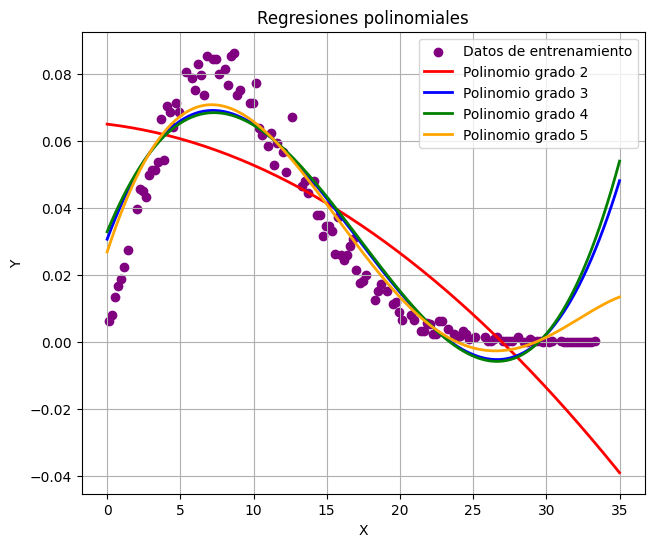

In [55]:
from sklearn.linear_model import ElasticNetCV

eg_0 = PolynomialFeatures(degree=2)
en_reg_0 = ElasticNetCV(alphas=[0.1, 0.15, 0.2, 0.25, 0.3],
                        l1_ratio=0.01,
                        cv=5,
                        max_iter=8000).fit(reg_0.fit_transform(X_test), Y_test)
X_plot_0 = reg_0.transform(X_axis)
Y_reg_0 = en_reg_0.predict(X_plot_0)

reg_1 = PolynomialFeatures(degree=3)
en_reg_1 = ElasticNetCV(alphas=[0.1, 0.15, 0.2, 0.25, 0.3],
                        l1_ratio=0.01,
                        cv=5,
                        max_iter=8000).fit(reg_1.fit_transform(X_test), Y_test)
X_plot_1 = reg_1.transform(X_axis)
Y_reg_1 = en_reg_1.predict(X_plot_1)

reg_2 = PolynomialFeatures(degree=4)
en_reg_2 = ElasticNetCV(alphas=[0.1, 0.15, 0.2, 0.25, 0.3],
                        l1_ratio=0.01,
                        cv=5,
                        max_iter=8000).fit(reg_2.fit_transform(X_test), Y_test)
X_plot_2 = reg_2.transform(X_axis)
Y_reg_2 = en_reg_2.predict(X_plot_2)

reg_3 = PolynomialFeatures(degree=5)
en_reg_3 = ElasticNetCV(alphas=[0.1, 0.15, 0.2, 0.25, 0.3],
                        l1_ratio=0.01,
                        cv=5,
                        max_iter=8000).fit(reg_3.fit_transform(X_test), Y_test)
X_plot_3 = reg_3.transform(X_axis)
Y_reg_3 = en_reg_3.predict(X_plot_3)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, label='Datos de entrenamiento', color='purple')
plt.plot(X_axis, Y_reg_0, 'r-', linewidth=2, label='Polinomio grado 2')
plt.plot(X_axis, Y_reg_1, 'b-', linewidth=2, label='Polinomio grado 3')
plt.plot(X_axis, Y_reg_2, 'g-', linewidth=2, label='Polinomio grado 4')
plt.plot(X_axis, Y_reg_3, 'orange', linewidth=2, label='Polinomio grado 5')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresiones polinomiales')
plt.legend()
plt.grid(True)

In [56]:
X_train_0 = reg_0.transform(X_train)
bias_cv_0, var_cv_0, mae_cv_0, mse_cv_0, r2_cv_0 = metrics(Y_train, en_reg_0.predict(X_train_0))
X_train_1 = reg_1.transform(X_train)
bias_cv_1, var_cv_1, mae_cv_1, mse_cv_1, r2_cv_1 = metrics(Y_train, en_reg_1.predict(X_train_1))
X_train_2 = reg_2.transform(X_train)
bias_cv_2, var_cv_2, mae_cv_2, mse_cv_2, r2_cv_2 = metrics(Y_train, en_reg_2.predict(X_train_2))
X_train_3 = reg_3.transform(X_train)
bias_cv_3, var_cv_3, mae_cv_3, mse_cv_3, r2_cv_3 = metrics(Y_train, en_reg_3.predict(X_train_3))

data = {
    'degree': [2, 3, 4, 5],
    'bias': [bias_cv_0, bias_cv_1, bias_cv_2, bias_cv_3],
    'var': [var_cv_0, var_cv_1, var_cv_2, var_cv_3],
    'mae': [mae_cv_0, mae_cv_1, mae_cv_2, mae_cv_3],
    'mse': [mse_cv_0, mse_cv_1, mse_cv_2, mse_cv_3],
    'r2': [r2_cv_0, r2_cv_1, r2_cv_2, r2_cv_3],
}

df2 = pd.DataFrame(data)

print(df2)

   degree      bias       var       mae       mse        r2
0       2 -0.000329  0.000832  0.015436  0.000360  0.589266
1       3 -0.002502  0.000698  0.008219  0.000107  0.877714
2       4 -0.002692  0.000692  0.008761  0.000122  0.860280
3       5 -0.001575  0.000729  0.006146  0.000063  0.928351


### 6. Presenta el mejor modelo polinomial y arumenta por qué es el mejor.

El modelo más efectivo fue la regresión polinomial de grado 4, que logró valores muy bajos en las métricas de $MSE$ y $MAE$, con un coeficiente de determinación $R^{2}$ cercano a 0.99. Esto indica un error significativamente bajo y un ajuste muy bueno a los datos reales.

Aunque los resultados son similares al polinomio de grado 5, el modelo de grado 4 es menos complejo, lo que lo convierte en una mejor opción.

### 7. Finalmente, utiliza la distribución de Rayleigh utilizando el estimador máximo verosimil: $scale = MLE$ y commpáralo con el modelo polinomial presentado en el punto 6, probando su rendimiento con el conjunto de prueba.

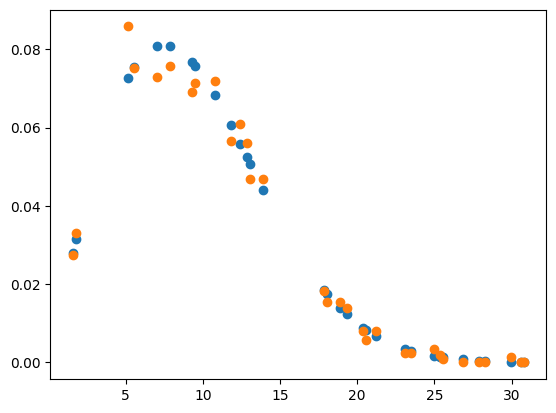

                 modelo     bias       var       mae       mse        r2
0              Rayleigh -0.00015  0.000906  0.002540  0.000014  0.983878
1  Polinomio de grado 4  0.00020  0.000864  0.002648  0.000013  0.985849
2            Diferencia -0.00035  0.000041 -0.000108  0.000002 -0.001971


In [57]:
mle = np.sqrt((np.sum(np.power(ma, 2))) / (2 * len(ma)))

def rayleigh_predict(X:np.ndarray, sigma:float):
  def rayleigh(x):
    return (x / np.power(sigma, 2)) * (np.exp((-1) * (np.power(x, 2)) / (2 * np.power(sigma, 2))))

  return np.array([rayleigh(x) for x in X])

Y_rayleigh = rayleigh_predict(X_test, mle)

plt.scatter(X_test, Y_rayleigh)
plt.scatter(X_test, Y_test)
plt.show()

bias_r, var_r, mae_r, mse_r, r2_r = metrics(Y_test, Y_rayleigh)

data = {
    'modelo': ['Rayleigh', 'Polinomio de grado 4', 'Diferencia'],
    'bias': [bias_r, bias_2, bias_r - bias_2],
    'var': [var_r, var_2, var_r - var_2],
    'mae': [mae_r, mae_2, mae_r - mae_2],
    'mse': [mse_r, mse_2, mse_r - mse_2],
    'r2': [r2_r, r2_2, r2_r - r2_2]
}

df3 = pd.DataFrame(data)
print(df3)

Utilizando el MLE se obtienen resultados muy buenos, al compararlo con el polinomio de grado 4 se puede observar que ambos modelos presentan diferencias mínimas en las métricas, aún después de usarlos con diferentes conjuntos de muestras aleatorias.